In [3]:
import pandas as pd


data = pd.read_csv('data_6.csv')

print(data)


      Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0            rain         9.472222                  7.388889      0.89   
1            rain         9.355556                  7.227778      0.86   
2            rain         9.377778                  9.377778      0.89   
3            rain         8.288889                  5.944444      0.83   
4            rain         8.755556                  6.977778      0.83   
...           ...              ...                       ...       ...   
96448        rain        26.016667                 26.016667      0.43   
96449        rain        24.583333                 24.583333      0.48   
96450        rain        22.038889                 22.038889      0.56   
96451        rain        21.522222                 21.522222      0.60   
96452        rain        20.438889                 20.438889      0.61   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0                14.1197                  

In [4]:
Q1

NameError: name 'Q1' is not defined

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#task 1

data = pd.read_csv('data_6.csv')
X = data.drop(columns=['Apparent Temperature (C)', 'Precip Type'])
y = data['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

print(y_pred)
print(mse)
print(mae)
print(r2)

[28.67149701  8.41144398 13.50844648 ... 18.72981224 12.61623971
 11.97186428]
1.1591182896343202
0.8486542196958874
0.9898913388357481


In [6]:
Q2

NameError: name 'Q2' is not defined

In [13]:
from sklearn import preprocessing

#task 2

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
X_pca = X_scaled.dot(eigenvectors[:, :3])

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)
mse_pca = np.mean((y_test_pca - y_pred_pca)**2)
mae_pca = np.mean(np.abs(y_test_pca - y_pred_pca))
r2_pca = 1 - (np.sum((y_test_pca - y_pred_pca)**2) / np.sum((y_test_pca - np.mean(y_test_pca))**2))

print(y_pred_pca)
print(mse_pca)
print(mae_pca)
print(r2_pca)

[28.11593266 10.55682203 13.45670164 ... 16.89509812  9.18825337
 11.09595931]
16.082606447390095
3.125107766648557
0.8597437201461405


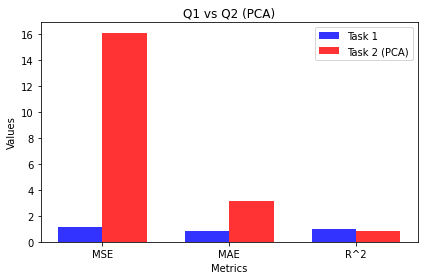

In [21]:
import matplotlib.pyplot as plt

labels = ['MSE', 'MAE', 'R^2']
metrics_task1 = [mse_task1, mae_task1, r2_task1]
metrics_task2 = [mse_task2, mae_task2, r2_task2]
bar_width = 0.35
index = np.arange(len(labels))
fig, ax = plt.subplots()
bar1 = ax.bar(index, metrics_task1, bar_width, label='Task 1', alpha=0.8, color='b')
bar2 = ax.bar(index + bar_width, metrics_task2, bar_width, label='Task 2 (PCA)', alpha=0.8, color='r')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Q1 vs Q2 (PCA)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [8]:
Q3

NameError: name 'Q3' is not defined

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Task 3

data = pd.read_csv('data_6.csv')

X = data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)  # Convert 'rain' to 1 and 'snow' to 0

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
X_pca = X_scaled.dot(eigenvectors[:, :3])

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)
y_pred = logistic_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.9478158695051148,
 0.9610938280139801,
 0.9805258414638924,
 0.9707125955234882)

In [ ]:
Q4

In [25]:
# Task 4
lasso_logistic_model = LogisticRegression(penalty='l1', solver='liblinear')  # L1 requires liblinear solver
lasso_logistic_model.fit(X_train_pca, y_train)
y_pred_lasso = lasso_logistic_model.predict(X_test_pca)

accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
precision_lasso = precision_score(y_test, y_pred_lasso)
recall_lasso = recall_score(y_test, y_pred_lasso)
f1_lasso = f1_score(y_test, y_pred_lasso)

accuracy_lasso, precision_lasso, recall_lasso, f1_lasso


(0.9478504285319326,
 0.9611307420494699,
 0.9805258414638924,
 0.9707314234730492)

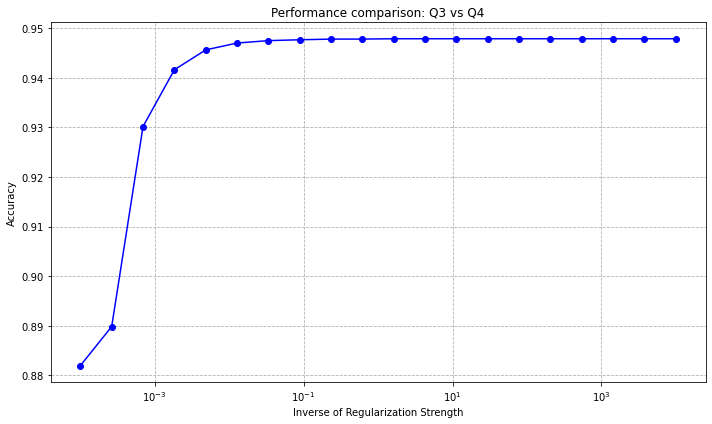

In [28]:
import matplotlib.pyplot as plt

C_values = np.logspace(-4, 4, 20) 
accuracies = []

for C in C_values:
    lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    lasso_logistic.fit(X_train_pca, y_train)
    y_pred_temp = lasso_logistic.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.semilogx(C_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Performance comparison: Q3 vs Q4')
plt.xlabel('Inverse of Regularization Strength')
plt.ylabel('Accuracy')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


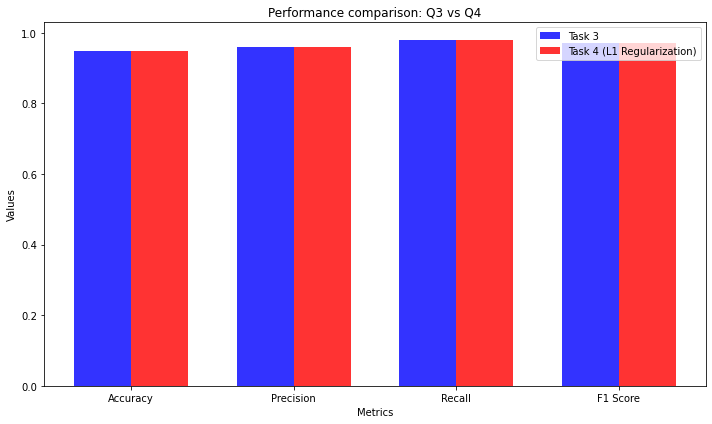

In [29]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

metrics_task3 = [accuracy, precision, recall, f1]
metrics_task4 = [accuracy_lasso, precision_lasso, recall_lasso, f1_lasso]

bar_width = 0.35
index = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, metrics_task3, bar_width, label='Task 3', alpha=0.8, color='b')
bar2 = ax.bar(index + bar_width, metrics_task4, bar_width, label='Task 4 (L1 Regularization)', alpha=0.8, color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Performance comparison: Task3 vs Task4')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
